In [1]:
print("Ada boostring algorithom and its basic")

Ada boostring algorithom and its basic


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
x,y=load_breast_cancer(return_X_y=True)
print(x.shape)
print(y.shape)


(569, 30)
(569,)


In [4]:
#base line  train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("traing samples :", x_train.shape)
print("Test samples :",x_test.shape)

traing samples : (426, 30)
Test samples : (143, 30)


In [5]:
print("traing samples :", y_train.shape)
print("Test samples :",y_test.shape)

traing samples : (426,)
Test samples : (143,)


In [7]:
#baseline model decision tree 
stump=DecisionTreeClassifier(max_depth=1,random_state=42)
stump.fit(x_train,y_train)
y_pred_stump=stump.predict(x_test)

print("decision tree accuracy :",accuracy_score(y_test,y_pred_stump))

decision tree accuracy : 0.8951048951048951


AdaBoostClassifier(...)

এটাই মূল Boosting মডেল।

▶ estimator=base_learner

(পুরোনো version-এ এটাকে base_estimator বলা হতো)

AdaBoost কোন মডেল দিয়ে শিখবে?

📌 মানে:

AdaBoost বারবার এই decision stump ব্যবহার করবে

n_estimators=100

📌 AdaBoost কতগুলো weak learner ব্যবহার করবে

100 মানে:

100টা decision stump

ধাপে ধাপে শেখা হবে

কম হলে:

underfitting

মডেল ভালো শিখবে না

বেশি হলে:

ভালো accuracy

কিন্তু:

training সময় বাড়ে

কখনো overfitting হতে পারে

▶ learning_rate=0.3

📌 প্রতিটা weak learner কতটা প্রভাব ফেলবে

Boosting-এ প্রতিটা model-এর weight থাকে

learning_rate সেই weight নিয়ন্ত্রণ করে

মানে কী?

0.3 → ধীরে ধীরে শেখা

প্রতিটা tree-এর contribution কম

learning_rate বেশি হলে (যেমন 1.0):

দ্রুত শেখে

কিন্তু:

overfitting হওয়ার ঝুঁকি

learning_rate কম হলে:

শেখা ধীর

কিন্তু:

generalization ভালো

In [9]:
#bulding a ada boost model 
base_learner=DecisionTreeClassifier(max_depth=1,random_state=42)
ada=AdaBoostClassifier(
    estimator=base_learner,
    n_estimators=100,
    learning_rate=0.3,
    random_state=42
)
ada.fit(x_train,y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.3, n_estimators=100, random_state=42)

**AdaBoostClassifier**

class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, random_state=None)

**Parameters:**
* estimator: object, default=None

The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.

* n_estimatorsint, default=50

The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range [1, inf).

* learning_rate: float, default=1.0

Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. Values must be in the range (0.0, inf).

* random_state: int, RandomState instance or None, default=None

Controls the random seed given at each estimator at each boosting iteration. Thus, it is only used when estimator exposes a random_state. Pass an int for reproducible output across multiple function calls


In [10]:
#prediction

y_pred_ada=ada.predict(x_test)
print("Ada boos accuracy : ", accuracy_score(y_test,y_pred_ada))

Ada boos accuracy :  0.958041958041958


In [12]:
print("classification_report is \n: ",classification_report(y_test,y_pred_ada))

classification_report is 
:                precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [13]:
confusion_matrix(y_test,y_pred_ada)

array([[51,  3],
       [ 3, 86]])

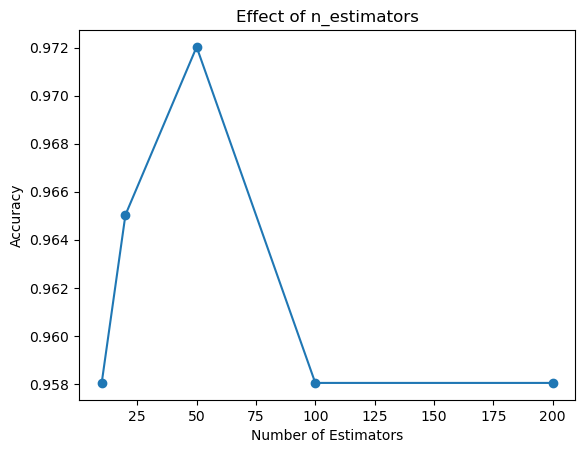

In [19]:
#Effect of Number of Estimators
estimators = [10,20,50,100,200]
accs = []
for n in estimators:
  model = AdaBoostClassifier(
      estimator = base_learner,
      n_estimators = n,
      learning_rate = 0.3,
      random_state = 42
  )
  model.fit(x_train,y_train)
  accs.append(accuracy_score(y_test,model.predict(x_test)))


plt.plot(estimators, accs, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators')
plt.show()

In [21]:
#effect of learning rate 

rates=[0.1,0.3,0.5,0.7,1]
accs_ir=[]

for ir in rates:
    model=AdaBoostClassifier(
        estimator=base_learner,
        n_estimators=50,
        learning_rate=ir,
        random_state=42
    )

    model.fit(x_train,y_train)
    accs_ir.append(accuracy_score(y_test,model.predict(x_test)))

<function matplotlib.pyplot.show(close=None, block=None)>

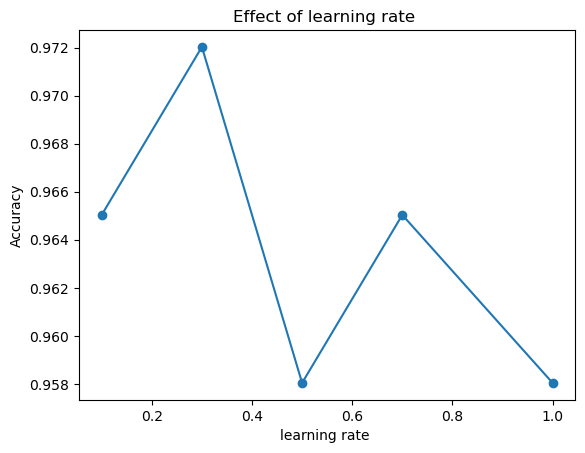

In [23]:
plt.plot(rates,accs_ir,marker='o')
plt.xlabel("learning rate ")
plt.ylabel("Accuracy")
plt.title("Effect of learning rate ")
plt.show


In [24]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for AdaBoost
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
    'estimator__max_depth': [1, 2]
}

# GridSearchCV setup
grid = GridSearchCV(
    estimator=AdaBoostClassifier(
        estimator=base_learner,
        random_state=42
    ),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Run grid search
grid.fit(x_train, y_train)

# Best model evaluation
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(x_test)

print("Best Parameters Found:")
print(grid.best_params_)
print("\nTest Accuracy (GridSearch AdaBoost):",
      accuracy_score(y_test, y_pred_grid))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

Best Parameters Found:
{'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 200}

Test Accuracy (GridSearch AdaBoost): 0.9790209790209791

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## 11. Limitations and Use Cases
AdaBoost performs well on clean data but struggles with heavy noise and outliers.

### Changes you can try
1. Change max_depth to 3-6 and observe results
2. Combine low learning rate with high estimators

3. Compare AdaBoost with a full decision tree and Random Forest
